<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/05_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Feature Selection using Statistical Filters</h1>

## Overview
Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable in order to reduce the computational cost of modeling and, in some cases, to improve the performance of the model.


Feature selection can be summarized as follows.

**Feature Selection:** Select a subset of input features from the dataset.    
   * **Unsupervised:** Do not use the target variable (e.g. remove redundant variables).    
       * Correlation    
   * **Supervised:** Use the target variable (e.g. remove irrelevant variables).
        * Wrapper: Search for well-performing subsets of features.
   * **Filter:** Select subsets of features based on their relationship with the target.
        * Statistical Methods
        * Feature Importance Methods
   * **Intrinsic:** Algorithms that perform automatic feature selection during training.
        * Decision Trees    

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section we will </p>
    <ol>
        <li>Import Categorical Data</li>
        <li>Import Numerical Data</li>
        <li>Import Target Data</li>       
        <li>Encode Categorical Data</li>
        <li>Encode Target Output</li>
        <li>Supervised Feature Selection</li>
        <li>Unsupervised Feature Selection</li>
    </ol>
</div>

### Standard Imports

In [ ]:
#Run this cell working in colab.
!pip install matplotlib=3.51

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Disable pretty
%pprint

%matplotlib inline

pd.set_option('display.max_columns', None)
#pd. set_option('display.max_rows', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

In [4]:
CATEGORICAL_FEATURES = ['gender', 'nationality','place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 
                        'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 
                        'student_absence_days']

NUMERICAL_FEATURES = ['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

TARGET = ['class']

### 1. Import Categorical Data

In [5]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
categorical_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv', usecols = CATEGORICAL_FEATURES, dtype='category')
categorical_df.dtypes

gender                        category
nationality                   category
place_of_birth                category
stage_id                      category
grade_id                      category
section_id                    category
topic                         category
semester                      category
relation                      category
parent_answering_survey       category
parent_school_satisfaction    category
student_absence_days          category
dtype: object

In [6]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
categorical_df = pd.read_csv(url, usecols = CATEGORICAL_FEATURES, dtype='category')
categorical_df.dtypes

gender                        category
nationality                   category
place_of_birth                category
stage_id                      category
grade_id                      category
section_id                    category
topic                         category
semester                      category
relation                      category
parent_answering_survey       category
parent_school_satisfaction    category
student_absence_days          category
dtype: object

### 2. Import Numerical Data

In [7]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
numerical_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv', usecols = NUMERICAL_FEATURES,dtype='int8' )
numerical_df.dtypes

raised_hands          int8
visited_resources     int8
announcements_view    int8
discussion            int8
dtype: object

In [8]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
numerical_df = pd.read_csv(url, usecols = NUMERICAL_FEATURES, dtype='int8')
numerical_df.dtypes

raised_hands          int8
visited_resources     int8
announcements_view    int8
discussion            int8
dtype: object

### 3. Import Target Data

In [9]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
target_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv', usecols = TARGET,dtype='category')
target_df.dtypes

class    category
dtype: object

In [10]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
target_df = pd.read_csv(url, usecols = TARGET, dtype='category')
target_df.dtypes

class    category
dtype: object

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
Machine learning models require all input and output variables to be numeric.
This means that if your data contains categorical data, you must encode it to numbers before you can apply ML algoritms.
</div>

### 4. Encode Categorical Data

In [11]:
categorical_ds = categorical_df.values
ordinal_encoder = OrdinalEncoder(dtype='int8')
categorical_ds  = ordinal_encoder.fit_transform(categorical_ds)
ordinal_encoder.categories_

[array(['F', 'M'], dtype=object), array(['Jordan', 'Kuwait', 'Others'], dtype=object), array(['Jordan', 'Kuwait', 'Others'], dtype=object), array(['HighSchool', 'LowerLevel', 'MiddleSchool'], dtype=object), array(['Higher', 'Lower'], dtype=object), array(['A', 'B', 'C'], dtype=object), array(['Humanities', 'IT', 'Language', 'Sciences'], dtype=object), array(['F', 'S'], dtype=object), array(['Father', 'Mum'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Bad', 'Good'], dtype=object), array(['Above-7', 'Under-7'], dtype=object)]

### 5 Encode Target Output

In [12]:
target_ds = target_df.values
label_encoder = LabelEncoder()
target_ds = label_encoder.fit_transform(target_ds)
label_encoder.classes_

array(['H', 'L', 'M'], dtype=object)

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> For supervised Feature Selection using statistical filters, there are two different test are appled in case of categorical target depending on input features.</p>
    <ol>
        <li>Categorical Input features - Chi Square Test</li>
        <li>Numerical Input features - f_classf (ANOVA)</li>
    </ol>
</div>

### 6 Supervised Feature Selection

#### Categorical Input Features (Chi Square)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(categorical_ds, target_ds, test_size=0.33, random_state=42)
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train);

In [14]:
# tabulating Chi Square results
categorical_results ={
    'features': CATEGORICAL_FEATURES,
    'scores':list(np.around(fs.scores_,2))
  }

In [15]:
categorical_rank = pd.DataFrame(categorical_results)
categorical_rank=categorical_rank.sort_values(by=['scores']).reset_index(drop=True)
categorical_rank

,features,scores
0,stage_id,0.17
1,grade_id,0.17
2,nationality,1.05
3,section_id,1.14
4,topic,1.63
5,semester,3.03
6,place_of_birth,3.71
7,gender,8.87
8,parent_school_satisfaction,22.40
9,relation,28.97


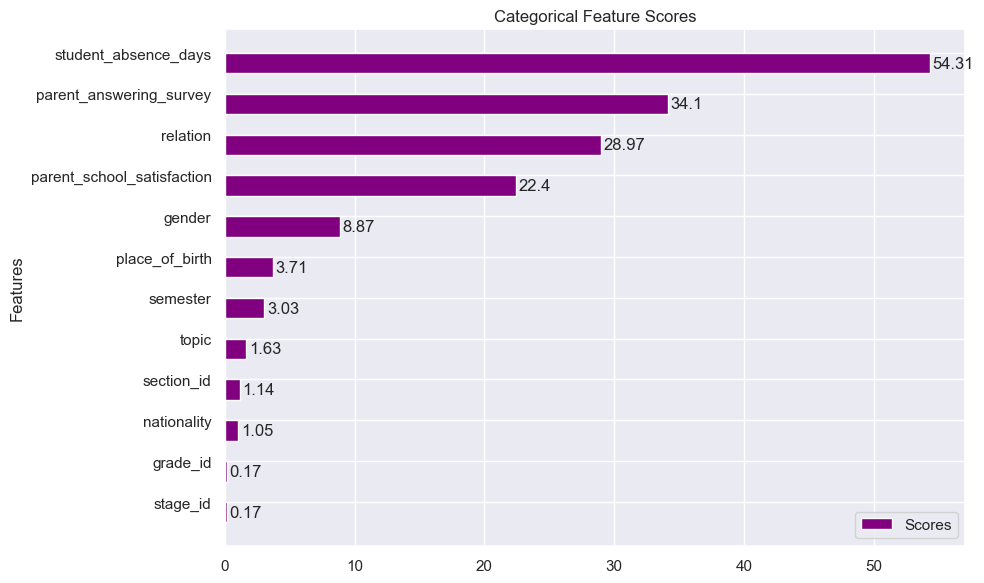

In [16]:
labels = list(categorical_rank['features'])
scores= list(categorical_rank['scores'])

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.barh(y - width/2, scores, width, label='Scores',color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Features')
ax.set_title("Categorical Feature Scores")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects, padding=2)

fig.tight_layout()

plt.show()

#### Numerical Input Features (ANOVA)

In [17]:
numerical_ds = numerical_df.values
scaler = StandardScaler()
numerical_ds = scaler.fit_transform(numerical_ds)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(numerical_ds,target_ds, test_size=0.33, random_state=42)
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train);

In [19]:
numerical_results={
    'features': NUMERICAL_FEATURES,
    'scores':list(np.around(fs.scores_,2))
  }

In [20]:
numerical_rank = pd.DataFrame(numerical_results)
numerical_rank=numerical_rank.sort_values(by=['scores']).reset_index(drop=True)
numerical_rank

,features,scores
0,discussion,18.88
1,announcements_view,57.96
2,raised_hands,116.22
3,visited_resources,149.59


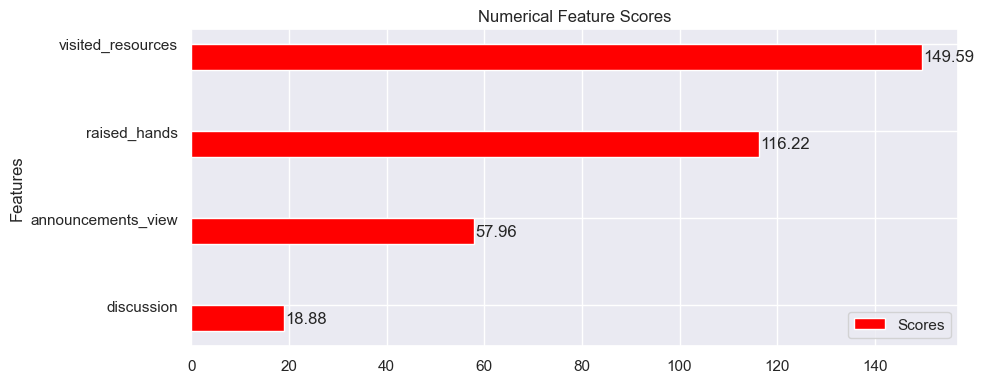

In [21]:
labels = list(numerical_rank['features'])
scores= list(numerical_rank['scores'])

y = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
rects = ax.barh(y - width/2, scores, width, label='Scores', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Features')
ax.set_title("Numerical Feature Scores")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects, padding=1)

fig.tight_layout()

plt.show()

#### Combining Feature Scores

In [22]:
features_rank = pd.concat([categorical_rank, numerical_rank]).reset_index(drop=True)
features_rank = features_rank.sort_values(by=['scores'])
features_rank

,features,scores
0,stage_id,0.17
1,grade_id,0.17
2,nationality,1.05
3,section_id,1.14
4,topic,1.63
5,semester,3.03
6,place_of_birth,3.71
7,gender,8.87
12,discussion,18.88
8,parent_school_satisfaction,22.40


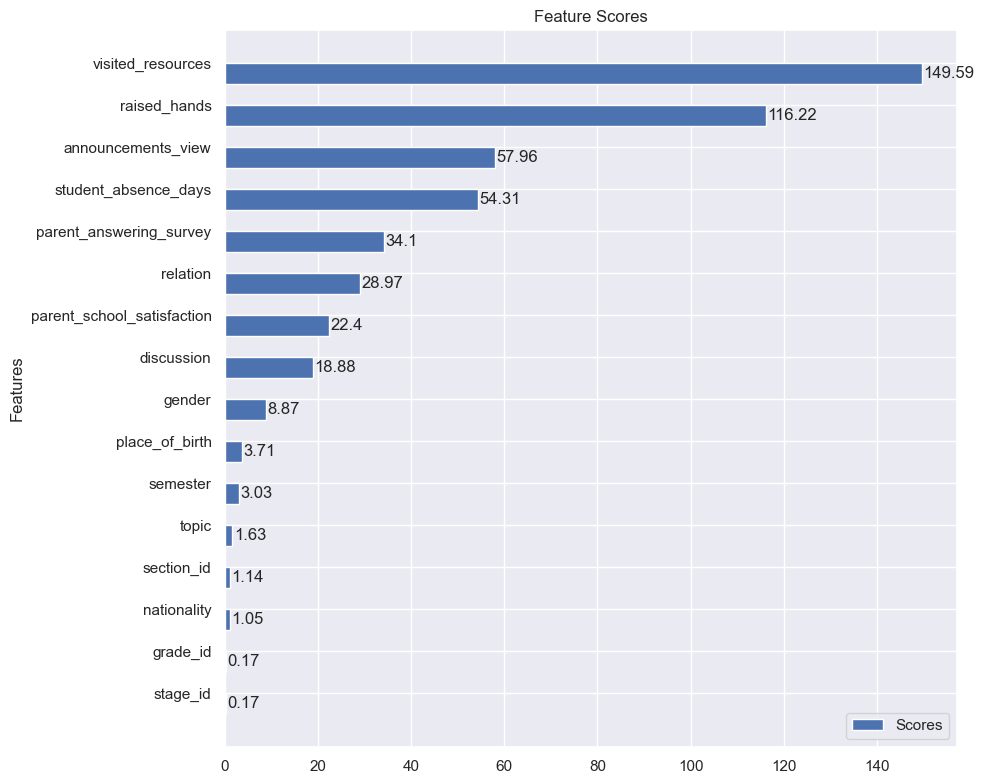

In [23]:
labels = list(features_rank['features'])
scores= list(features_rank['scores'])

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects = ax.barh(y - width/2, scores, width, label='Scores')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Features')
ax.set_title("Feature Scores")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects, padding=1)

fig.tight_layout()

plt.show()

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> For unsupervised Feature Selection using statistical filters two different tests are appled in pair to all input features.</p>
    <ol>
        <li>Categorical Input features - Chi Square Test (Hypothesis Test)</li>
        <li>Numerical Input features - Correlation </li>
    </ol>
</div>

### 7 Unsupervised Feature Selection

#### Categorical Input features - Chi Square Test (Hypothesis Test)

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p>While conducting the chi-square test we have to initially consider 2 hypothesis i.e the Null Hypothesis and the Alternate Hypothesis.</p>

<p style="color:blue">H0 (Null Hypothesis) = The 2 variables to be compared are independent.</p>
<p style="color:blue">H1 (Alternate Hypothesis) = The 2 variables are dependent.</p>
    
<p>Set of independent variables (higher probabilities) are selected</p>
</div>

In [24]:
df = pd.DataFrame(categorical_ds, columns=CATEGORICAL_FEATURES, dtype='int8')
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val


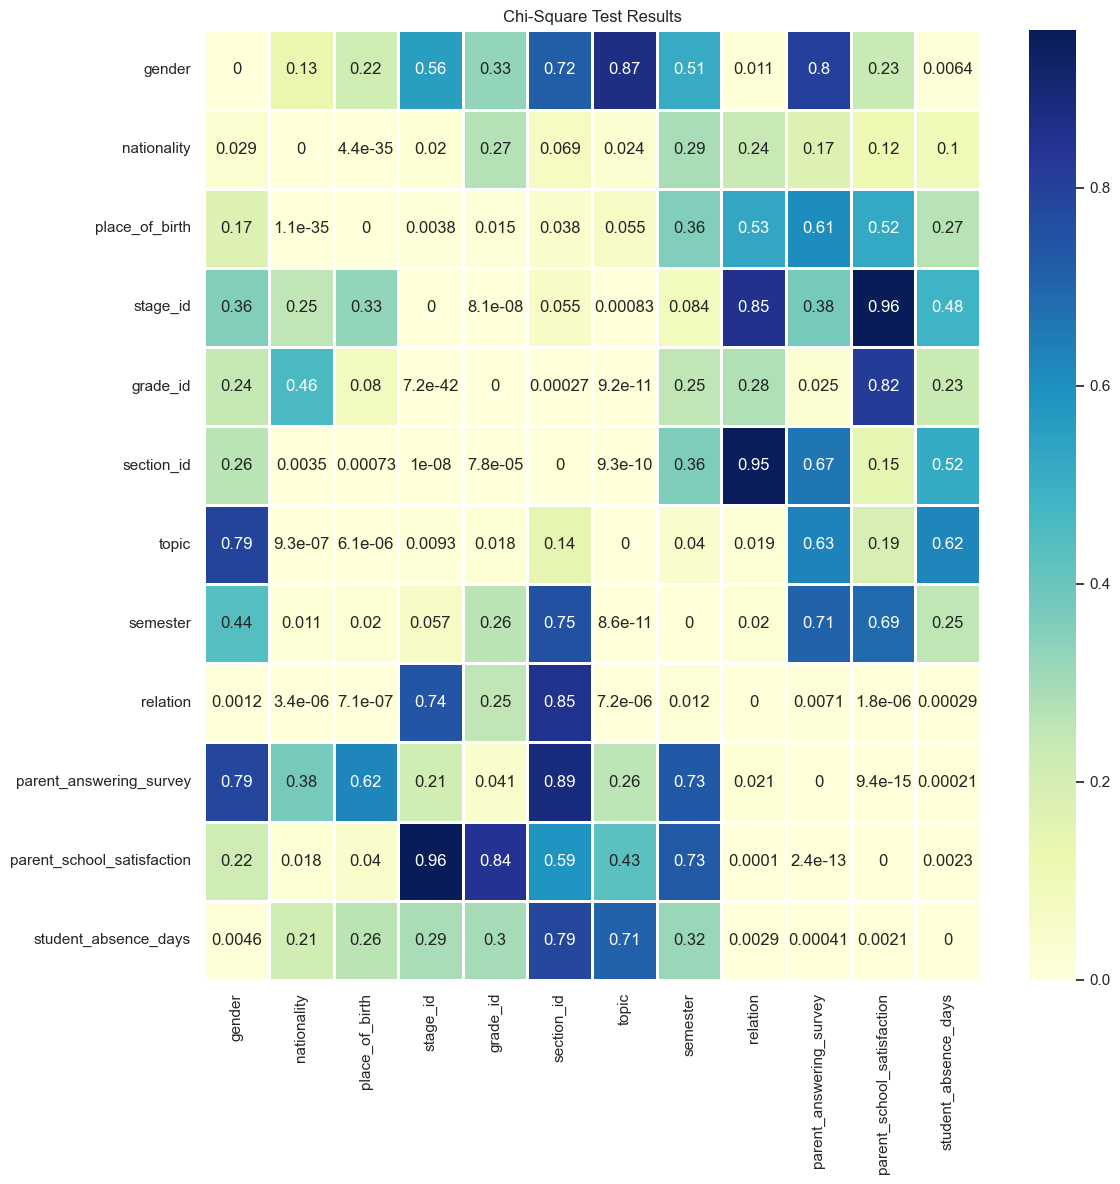

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap((resultant), annot=True, cmap="YlGnBu",linewidths=.8)
plt.title('Chi-Square Test Results')
plt.show()

#### Numerical Input features - Correlation

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
<p>In pair wise correlation, out of two highly correlated feature one is selected. </p>
</div>

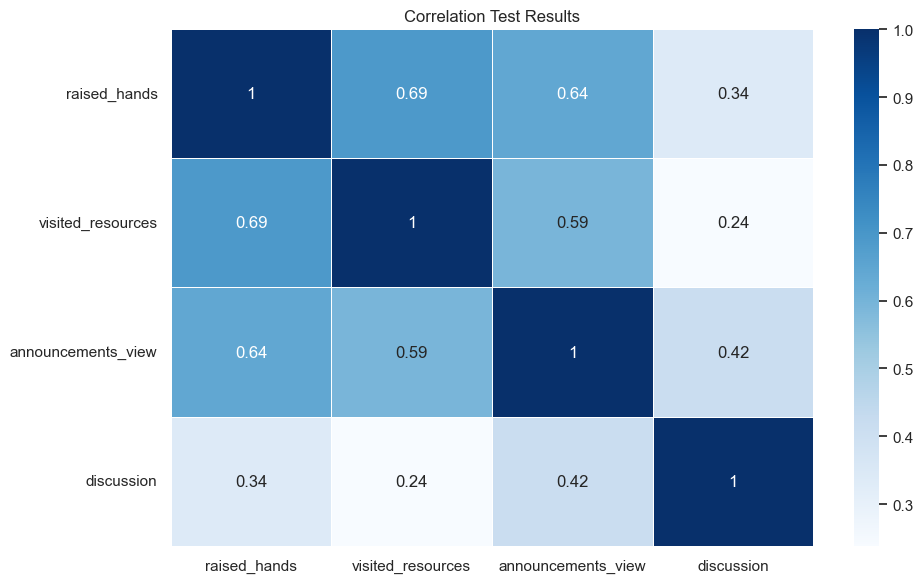

In [26]:
correlation = numerical_df.corr()
plt.figure(figsize = (10,6))
plt.title('Correlation Test Results')
sns.heatmap(correlation, annot = True,cmap='Blues', linewidth=0.5);

## Observations
Applying Supervised Statiscal Feature Selection techniques we tabulated and plotted:    

1. Scores of categorical fearures ranking them according to the importance using Chi Square Test.
2. Scores of numerical fearures ranking them according to the importance using ANOVA.   
3. Combined scores for better assement.    

Applying Supervised Statiscal Feature Selection techniques we plotted pair wise:    

1. Chi Sqaure test probabilty values to help in selection of independent categorical features.    
2. Correlation coefficent values to help in dropping one of the two higly correlated numerical features. 

## Conclusion
Based on the obervations in tabulated and plotted scores top eight features are:
    <ol>
    <li>visited_resources	        <b>(149.59)</b></li>
    <li>raised_hands	            <b>(116.22)</b></li>
    <li>announcements_view	        <b>(57.96)</b></li>
    <li>student_absence_days	    <b>(54.31)</b></li>
    <li>parent_answering_survey	    <b>(34.10)</b></li>
    <li>relation	                <b>(28.97)</b></li>
    <li>parent_school_satisfaction	<b>(22.40)</b></li>
    <li>discussion	                <b>(18.88)</b></li>
    </ol>